In [46]:
import re
from scipy.stats import sem

def generateAverageAndStdTime(workerDataPath):
    with open('generatedData/' + workerDataPath) as f:
        lines = f.readlines()

        split = [re.split(' |\n', time)[0] for time in lines]
        getMin = [time[2:7] for time in split]
        replaceColon = [time.replace(':', '.') for time in getMin]
        allTimes = [float(time) for time in replaceColon]
        
        average = sum(allTimes) / len(allTimes)
        rounded = round(average, 5)
        
        std = sem(allTimes)
        
        return std, average

        

std, avg = generateAverageAndStdTime("duration_1_worker.txt")

In [43]:
import math

def generateYAndStd(*paths):
    yList = []
    stdList = []
    for path in paths:
        std, avg = generateAverageAndStdTime(path)
        
        yList.append(avg)
        stdList.append(std)
    
    stdList = [10**-8 if math.isnan(x) else x for x in stdList]
    
    return stdList, yList

In [54]:
stdWeak, yWeak = generateYAndStd("duration_1_worker.txt", "duration_2_workers.txt", "duration_3_worker.txt")

# Workers
x = [1, 2, 3]

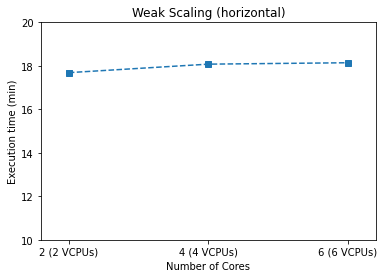

In [56]:
import matplotlib.pyplot as plt

plt.errorbar(x, yWeak, stdWeak, linestyle='--', marker='s', capsize=3)

my_xticks = ['2 (2 VCPUs)','4 (4 VCPUs)','6 (6 VCPUs)']
plt.xticks(x, my_xticks)
#plt.axis([0.8, 3.2, 10, 20])


plt.xlabel("Number of Cores")
plt.ylabel("Execution time (min)")
plt.title("Weak Scaling (horizontal)")


plt.show()
#plt.savefig('weak_scaling_truncated.png')

In [57]:
# Strong
stdStrong, yStrong = generateYAndStd("duration_strong_1_worker.txt", "duration_strong_2_worker_v2.txt", "duration_strong_3_worker_v2.txt")

/home/ubuntu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ubuntu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [49]:
print(std)

[1e-08, 0.010307764064044128, 0.005773502691896263]


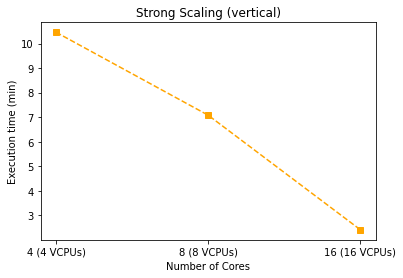

In [58]:
plt.errorbar(x, yStrong, stdStrong, linestyle='--', marker='s', capsize=3, c='orange')

#plt.axis([0.8, 3.2, 10, 20])

my_xticks = ['4 (4 VCPUs)','8 (8 VCPUs)','16 (16 VCPUs)']
plt.xticks(x, my_xticks)

plt.xlabel("Number of Cores")
plt.ylabel("Execution time (min)")
plt.title("Strong Scaling (vertical)")


plt.show()
#plt.savefig('weak_scaling_truncated.png')